In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

The construction of the envelope function is much more straightforward
if the distribution p(z) is log concave.

Lets consider Gaussian distribution

$$
p(z) =
\frac{1}{\sqrt{2\pi}}
\exp
\left\{
  -\frac{(x-\mu)^2}{2\sigma^2}
\right\}
$$

$$
h(z) = \ln p(z) =
-\frac{1}{2}ln(2\pi)
-\frac{(x-\mu)^2}{2\sigma^2}
$$

Lets plot these fuckers

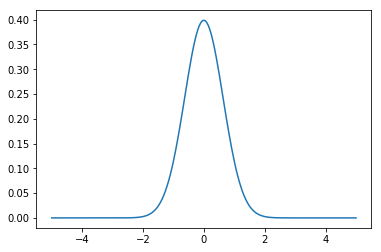

In [2]:
def compute_gaussian(x, mu, sigma):
    term1 = 1./(math.sqrt(2 * math.pi))
    term2_exp = -(x-mu)**2 /(2*sigma)**2
    return term1 * math.e**term2_exp

def compute_gaussian_range(x, mu, sigma):
    return [compute_gaussian(xx, mu, sigma) for xx in x]

def show_gaussian(x_max=5, mu=0, sigma2=0.2):
    x = np.linspace(1e-5, x_max, 100)
    x = np.append(-x[::-1],x)
    sigma2 = max(10e-10, sigma2)
    y = compute_gaussian_range(x, mu, math.sqrt(sigma2))
    plt.plot(x, y)
    plt.show()

interactive(show_gaussian, x_max=(0,10), 
            mu=(-5,5,0.1), sigma2=(0, 2, 0.1))

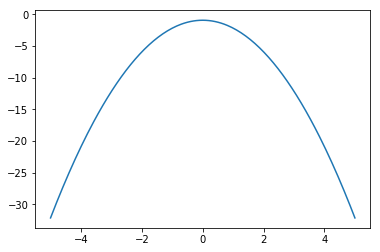

In [3]:
def compute_gaussian_lc(x, mu, sigma):
    term1 = -0.5 * math.log(2 * math.pi)
    term2_exp = -(x-mu)**2 /(2*sigma)**2
    return term1 + term2_exp

def compute_gaussian_lc_range(x, mu, sigma):
    return [compute_gaussian_lc(xx, mu, sigma) for xx in x]

def show_gaussian_lc(x_max=5, mu=0, sigma2=0.2):
    x = np.linspace(1e-5, x_max, 100)
    x = np.append(-x[::-1],x)
    sigma2 = max(10e-10, sigma2)
    y = compute_gaussian_lc_range(x, mu, math.sqrt(sigma2))
    plt.plot(x, y)
    plt.show()

interactive(show_gaussian_lc, x_max=(0,10), 
            mu=(-5,5,0.1), sigma2=(0, 2, 0.1))

\begin{array}{rlr}
y_1 &= m_1 x_1 + c1 \\
y_2 &= m_2 x_1 + c2 \\
m_1 x_1 + c_1 &= m_2 x_1 + c_2\\
(m_1-m_2)x_1 &= c_2 - c_1 \\
x_1 &= \frac{c_2 - c_1}{m_1 - m_2} \\
y_1 &= m_1 \frac{c_2 - c_1}{m_1 - m_2} + c1
\end{array}

In [4]:
def tgt_intersection(tgt1, tgt2):
    x1 = (tgt2['c'] - tgt1['c'])/(tgt1['m']-tgt2['m'])
    y1 = tgt1['m'] * x1 + tgt1['c']
    return (x1, y1)

the algo  
1. choose a set of grid points, ie, set of points for which we compute ln p(z) and its gradient

In [5]:
def tangent_at_pt(fun_p, *args):
    x_val = args[0]
    y_val = fun_p(*args)
    
    delta = 0.1
    y_val_left  = fun_p(x_val-delta, *args[1:])
    y_val_right = fun_p(x_val+delta, *args[1:])
    slope = (y_val_right - y_val_left)/(2*delta)
    intercept = y_val - slope * x_val
    return {'x':x_val, 'y': y_val, 'm': slope, 'c': intercept}

def tgt_y(tgt, x):
    return [tgt['m']*xx + tgt['c'] for xx in x]

def tgt_plt(tgt, x0, x1):
    x = np.linspace(x0,x1,100)
    plt.plot(x, tgt_y(tgt,x))

def plot_segment(tgt1, tgt2):
    x1,y1 = tgt_intersection(tgt1, tgt2)
    x0, y0 = tgt1['x'], tgt1['y']
    x2, y2 = tgt2['x'], tgt2['y']
    tgt_plt(tgt1, x0, x1)
    tgt_plt(tgt2, x1, x2)
    plt.plot(x1,y1,'*')
    return (x0,x1)
    
def plot_segments(tgts):
    tgts = sorted(tgts, key=lambda t: t['x'])
    # plt grid pts
    [plt.plot(t['x'], t['y'],'*') for t in tgts]
    pts = [plot_segment(tgts[ix-1], tgts[ix]) for ix in range(1,len(tgts))]
    

In [6]:
def choose_equally_spaced(pts, in_pts):
    return [pts[math.floor(ix)] for ix in np.linspace(0,1,in_pts)*(len(pts)-1)]

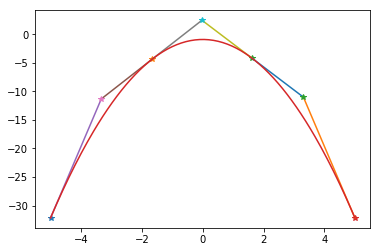

In [7]:
x_max = 5
x = np.linspace(1e-5,x_max,100)
x = np.append(-x[::-1], x)

mu, sigma = 0, math.sqrt(0.2)

#grid_pts = np.random.choice(x, 4)
grid_pts = choose_equally_spaced(x, 4)
tgts = [tangent_at_pt(compute_gaussian_lc, xx, mu, sigma) for xx in grid_pts]
plot_segments(tgts)
plt.plot(x, compute_gaussian_lc_range(x, mu, sigma),'-')
plt.show()

In [8]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [9]:
[math.floor(x) for x in np.linspace(0,1,10)*29]

[0, 3, 6, 9, 12, 16, 19, 22, 25, 29]

In [10]:
x = np.linspace(0,1,20)
np.random.choice(x,5)

array([ 0.89473684,  0.42105263,  0.        ,  1.        ,  1.        ])

In [11]:
x = np.linspace(1,5,10)
#print(x)
#print(x[::-1])
print(np.append(-x[::-1], x))


[-5.         -4.55555556 -4.11111111 -3.66666667 -3.22222222 -2.77777778
 -2.33333333 -1.88888889 -1.44444444 -1.          1.          1.44444444
  1.88888889  2.33333333  2.77777778  3.22222222  3.66666667  4.11111111
  4.55555556  5.        ]


In [12]:
def plot_tangent(tgt, x, y_max=1):
    y = tgt_y(tgt, x)
    ixs = [ix for (ix,yy) in enumerate(y) if yy<=y_max]
    y_f = [y[ix] for ix in ixs]
    x_f = [x[ix] for ix in ixs]
    plt.plot(x_f, y_f)
    plt.plot(tgt['x'],tgt['y'],'*')
